# Obtención do diagrama P-x para unha temperatura de 115 ºC para unha mestura de hepano e octano.


In [19]:
import numpy as np

In [20]:
# Parámetros de Antoine

# Heptano
A_heptano = 4.02832
B_heptano = 1268.636
C_heptano = -56.199

#Octano
A_octano=4.04867
B_octano=1355.126
C_octano=-63.633

# Alternativa
# A = [A_heptano, A_octano]
# B=[B_heptano, B_octano]
# A[0] = A del heptano

# Dato: temperatura
T = 115 + 273.15 # K

# Cálculo da presión de vapor dos compoñentes puros (ecuación de Antoine)

In [21]:
pv_heptano = 10 ** ( A_heptano - B_heptano / ( T + C_heptano ) ) # bar
pv_octano  = 10 ** ( A_octano  - B_octano  / ( T + C_octano  ) ) # bar

print(f'A presión de vapor do heptano puro é de {pv_heptano:6.4f} bar.') # compoñente mais volátil, maior presión de vapor
# print('A presión de vapor do heptano puro é de {:6.4f} bar.'.format(pv_heptano)) #más volátil, mayor presión de vapor
print(f'A presión de vapor do octano puro é de {pv_octano:6.4f} bar.') # compoñente mais volátil, maior presión de vapor
# print('A presión de vapor do octano puro {:6.4f} bar.'.format(pv_octano))

A presión de vapor do heptano puro é de 1.6090 bar.
A presión de vapor do octano puro é de 0.7462 bar.


## Creación do diagrama Pxy

In [22]:
import matplotlib.pyplot as plt
# Vector de valores de x
x_heptano = np.linspace(0,1,11)
# Calcula a presión total a partires das presións de vapor e as fraccións molares na fase vapor
P_total = x_heptano * pv_heptano + ( 1 - x_heptano ) * pv_octano
# Cálculo das presións de burbulla 
P_burbulla = x_heptano * pv_heptano + ( 1 - x_heptano ) * pv_octano
# Cálculo dos valores de y
y_heptano = pv_heptano * x_heptano / P_burbulla
# Cálculo das presións de orballo
P_orballo = 1 / ( y_heptano / pv_heptano + ( 1 - y_heptano ) / pv_octano )

Text(0.5, 1.0, 'Diagrama P-x,y')

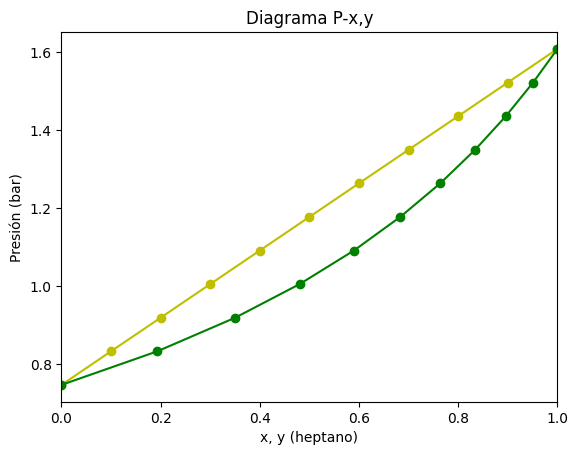

In [23]:
# Representación do diagrama P-x,y
plt.plot(x_heptano, P_burbulla, 'yo-', y_heptano, P_orballo, 'go-')
plt.xlim(0,1)
plt.xlabel('x, y (heptano)')
plt.ylabel('Presión (bar)')
plt.title('Diagrama P-x,y')

## APARTADO 2. OBTENCIÓN DEL DIAGRAMA T-x,y A PARTIR DE UNA PRESIÓN TOTAL DADA

In [24]:
from scipy.optimize import fsolve
#Datos ejercicio
P_t=1.5 #bar
x_hept=np.linspace(0,1,11)
#Se supone una temperatura de partida
T_guess=396
#Se crean dos listas en las que se almacenarán los datos de temperatura y fracciones molares del heptano para cada x
lista_temperatura=[]
lista_y=[]

#Se definen las funciones para obtener las presiones de saturación del heptano y el octano
def p_sat_hept(T):
    return 10**(A_hept-B_hept/(T+C_hept))

def p_sat_oct(T):
    return 10**(A_oct-B_oct/(T+C_oct))

#Se crea un bucle que devuelva el valor de la temperatura y la fracción molar de vapor para cada valor de x
for i in x_hept:
    def fmin(T):
        return i*p_sat_hept(T)/P_t+(1-i)*p_sat_oct(T)/P_t-1
    solucion=fsolve(fmin,T_guess)
    lista_temperatura.append(solucion[0])
    y_hept=i*p_sat_hept(solucion)/P_t
    lista_y.append(y_hept[0])

print(lista_temperatura) #valores de temperatura calculados
print(lista_y) #valores de y calculados

NameError: name 'A_hept' is not defined

Text(0.5, 1.0, 'Diagrama T-x,y')

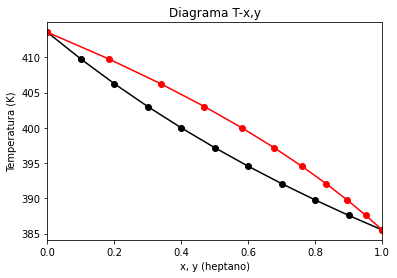

In [ ]:
#Representación del diagrama T-x,y
import matplotlib.pyplot as plt
plt.plot(x_hept, lista_temperatura, 'ko-', lista_y, lista_temperatura, 'ro-')
plt.xlim(0,1)
plt.xlabel('x, y (heptano)')
plt.ylabel('Temperatura (K)')
plt.title('Diagrama T-x,y')

In [ ]:
#También se puede realizar con fsolve aplicado a la ecuación de Antoine, y no al sumatorio de y - 1
z=np.linspace(0,1, num=11) #composición inicial
#Funciones para determinar las presiones de saturación de los dos compuestos
def Psat1(T):
    return 10**(A_hept-B_hept/(T+C_hept))
def Psat2(T):
    return 10**(A_oct-B_oct/(T+C_oct))

#Datos del enunciado
y=z
P = 1.5 #bar
from scipy.optimize import fsolve


def fun1(T):
    return P - 10**(A_hept-B_hept/(T+C_hept)) # a qué temperatura P externa es igual al otro término
Tinf=fsolve(fun1, 350) #350K valor supuesto inicial, Tinf=temperatura de ebullición del componente 1

def fun2(T):
    return P - 10**(A_oct-B_oct/(T+C_oct))
Tsup=fsolve(fun2, 373) #Tsup=temperatura de ebullición del componente 2

print('La temperatura a la que hierve el componente 1 a la presión externa es {:5.2f} K.'.format(Tinf[0]))
print('La temperatura a la que hierve el componente 2 a la presión externa es {:5.2f} K.'.format(Tsup[0]))


La temperatura a la que hierve el componente 1 a la presión externa es 385.52 K.
La temperatura a la que hierve el componente 2 a la presión externa es 413.56 K.


Text(0.5, 1.0, 'Diagrama T-x, y')

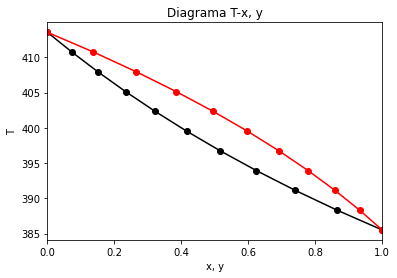

In [ ]:
T=np.linspace(Tinf,Tsup, num=11)
x = (P-Psat2(T))/(Psat1(T)-Psat2(T))
y=x*Psat1(T)/P
plt.plot(x, T,'ko-', y,T,'ro-')
plt.xlim(0,1)
plt.xlabel('x, y')
plt.ylabel('T')
plt.title('Diagrama T-x, y')